In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# Load the dataset
file_path = "DA -Task 2..xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# 1. Column-Wise Analysis

In [3]:
print("Column Information:")
print(df.info())

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   VIN                            100 non-null    object        
 1   TRANSACTION_ID                 100 non-null    int64         
 2   CORRECTION_VERBATIM            100 non-null    object        
 3   CUSTOMER_VERBATIM              100 non-null    object        
 4   REPAIR_DATE                    100 non-null    datetime64[ns]
 5   CAUSAL_PART_NM                 95 non-null     object        
 6   GLOBAL_LABOR_CODE_DESCRIPTION  100 non-null    object        
 7   PLATFORM                       100 non-null    object        
 8   BODY_STYLE                     100 non-null    object        
 9   VPPC                           100 non-null    object        
 10  PLANT                          99 non-null     object        
 11  

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
VIN                                0
TRANSACTION_ID                     0
CORRECTION_VERBATIM                0
CUSTOMER_VERBATIM                  0
REPAIR_DATE                        0
CAUSAL_PART_NM                     5
GLOBAL_LABOR_CODE_DESCRIPTION      0
PLATFORM                           0
BODY_STYLE                         0
VPPC                               0
PLANT                              1
BUILD_COUNTRY                      0
LAST_KNOWN_DLR_NAME                0
LAST_KNOWN_DLR_CITY                0
REPAIRING_DEALER_CODE              0
DEALER_NAME                        0
REPAIR_DLR_CITY                    0
STATE                              2
DEALER_REGION                      0
REPAIR_DLR_POSTAL_CD               2
REPAIR_AGE                         0
KM                                 0
COMPLAINT_CD_CSI                   0
COMPLAINT_CD                       0
VEH_TEST_GRP                       2
COUNTRY_SALE_ISO                   0
ORD_SELLING_SRC_CD   

In [5]:
print("Unique Values per Column:")
print(df.nunique())

Unique Values per Column:
VIN                               98
TRANSACTION_ID                    32
CORRECTION_VERBATIM               93
CUSTOMER_VERBATIM                100
REPAIR_DATE                       29
CAUSAL_PART_NM                    18
GLOBAL_LABOR_CODE_DESCRIPTION      4
PLATFORM                          11
BODY_STYLE                         6
VPPC                              26
PLANT                             11
BUILD_COUNTRY                      3
LAST_KNOWN_DLR_NAME              100
LAST_KNOWN_DLR_CITY               94
REPAIRING_DEALER_CODE             95
DEALER_NAME                      100
REPAIR_DLR_CITY                   93
STATE                             39
DEALER_REGION                      2
REPAIR_DLR_POSTAL_CD              92
REPAIR_AGE                        35
KM                               100
COMPLAINT_CD_CSI                   1
COMPLAINT_CD                       7
VEH_TEST_GRP                      23
COUNTRY_SALE_ISO                   6
ORD_SELLING_

In [6]:
# Describe numerical columns
print("Numerical Column Statistics:")
print(df.describe())

Numerical Column Statistics:
       TRANSACTION_ID          REPAIR_DATE  DEALER_REGION  REPAIR_AGE  \
count      100.000000                  100      100.00000  100.000000   
mean     13036.900000  2024-01-22 07:26:24        1.09000   14.940000   
min      13021.000000  2024-01-02 00:00:00        1.00000    0.000000   
25%      13027.750000  2024-01-12 00:00:00        1.00000    5.000000   
50%      13036.000000  2024-01-24 12:00:00        1.00000   12.000000   
75%      13041.250000  2024-02-01 00:00:00        1.00000   21.000000   
max      13081.000000  2024-02-07 00:00:00        4.00000   50.000000   
std         12.028166                  NaN        0.51434   12.367945   

                  KM  COMPLAINT_CD_CSI  ORD_SELLING_SRC_CD  GLOBAL_LABOR_CODE  \
count     100.000000             100.0          100.000000         100.000000   
mean    24914.230000               0.0           24.590000         251.900000   
min         3.000000               0.0           11.000000          20

In [7]:
# Describe categorical columns
df_categorical = df.select_dtypes(include=['object'])
print("\nCategorical Column Distribution:")
for col in df_categorical.columns:
    print(f"{col}: {df_categorical[col].nunique()} unique values")
    print(df_categorical[col].value_counts().head(5))
    print("---")


Categorical Column Distribution:
VIN: 98 unique values
VIN
3HRS9EED0LH255650    2
1HRFFHEL8RZ133325    2
1HRFFEE8XSZ230636    1
3HCFDDE89SH220903    1
1HRFFHEL1RZ181474    1
Name: count, dtype: int64
---
CORRECTION_VERBATIM: 93 unique values
CORRECTION_VERBATIM
REPLACED STEERING WHEEL                                                                                                                                                                                                                                                         3
Steering Wheel Replacement                                                                                                                                                                                                                                                      3
Replaced steering wheel                                                                                                                                                                      

# 2. Data Cleaning

### Drop columns with too many missing values

In [8]:
# Drop columns with more than 50% missing values
missing_threshold = 0.5
df = df.loc[:, df.isnull().mean() < missing_threshold]

In [9]:
def fill_categorical_with_mode(column):
    mode_value = df[column].mode()[0] if not df[column].mode().empty else "Unknown"
    df[column].fillna(mode_value, inplace=True)

### Fill missing categorical values using the most frequent category

In [10]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    fill_categorical_with_mode(col)

C:\Users\HP\AppData\Local\Temp\ipykernel_11092\417957899.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(mode_value, inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_11092\417957899.py:2: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  mode_value = df[column].mode()[0] if not df[column].mode().empty else "Unknown"


### Impute missing numerical values using median

In [11]:
def fill_numerical_with_median(column):
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)

numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    fill_numerical_with_median(col)

C:\Users\HP\AppData\Local\Temp\ipykernel_11092\294590986.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)


### Convert 'REPAIR_DATE' to proper date format

In [12]:
df["REPAIR_DATE"] = pd.to_datetime(df["REPAIR_DATE"], errors="coerce")

In [13]:
df["REPAIR_DATE"] = pd.to_datetime(df["REPAIR_DATE"], errors="coerce")

### Standardize text fields to uppercase

In [14]:
def standardize_text(column):
    df[column] = df[column].str.upper()

text_columns = ["PLATFORM", "BODY_STYLE"]
for col in text_columns:
    standardize_text(col)

### Remove duplicate records

In [15]:
df.drop_duplicates(inplace=True)

### Outlier detection and removal for numerical columns

In [16]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [17]:
df

,VIN,TRANSACTION_ID,CORRECTION_VERBATIM,CUSTOMER_VERBATIM,REPAIR_DATE,CAUSAL_PART_NM,GLOBAL_LABOR_CODE_DESCRIPTION,PLATFORM,BODY_STYLE,VPPC,...,TRANSMISSION_TRACE_NBR,SRC_TXN_ID,SRC_VER_NBR,TRANSACTION_CNTR,MEDIA_FLAG,VIN_MODL_DESGTR,LINE_SERIES,LAST_KNOWN_DELVRY_TYPE_CD,NON_CAUSAL_PART_QTY,SALES_REGION_CODE
0,3HCFDDE89SH220903,13021,REPLACED STEERING WHEEL NOW OKAY,STEERING WHEEL COMING APART,2024-01-02,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,S2210121CNJX0941,2808908219,6,1,N,CF10543,1500,21.0,0,1
3,3HCFDFEL3SH241701,13021,STEERING WHEEL REPLACEMENT,CUSTOMER STATES THE LETTERING AND FINISH ON TH...,2024-01-04,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,S1210822CKJX0291,2808892288,6,1,Y,CF10543,1500,10.0,0,1
7,3HCFDFED4SH352945,13021,REPLACED STEERING WHEEL,Special Order Part [ steering wheel heated ste...,2024-01-05,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,S1212982CKJX2188,2808882287,4,1,N,CF10543,1500,15.0,0,1
10,1HCFDHE86SZ274242,13023,GAINED ACCESS AND REMOVED OLD STEERING WHEEL A...,C/S: REMOVED STEERING WHEEL TO GAIN ACCESS TO ...,2024-01-09,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,R2212281CNJX0022,2809222210,6,1,N,CF10543,1500,10.0,0,1
17,1H1FZ6S00N4109597,13025,"REPLACE STEERING WHEEL CHECK OK 1699-,0130",HEATED STEERING WHEEL INOP. WHEN YOU HIT THE B...,2024-01-11,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,GLOBAL GAMMA,4 DOOR SEDAN,C121,...,21210129IKBP0429,2809122794,4,1,N,1FG48,Premier,21.0,0,1
20,3HRFFCER3NH528824,13025,"PRA APPROVED, PRA #495794600000 FOUND THE STEE...",CUSTOMER STATES STITCHING ON STEERING WHEEL IS...,2024-01-11,WHEEL ASM-STRG *BLACK,Steering Wheel Replacement,FULL-SIZE TRUCKS,CREW CAB,T1CGF,...,S1220791CNJX0210,2809294191,4,1,N,TF10543,1500,10.0,0,1
25,1HCFDEED3SZ308171,13037,Replaced steering wheel,WRAP ON THE STEEERING WHEEL IS PEELING ***NEED...,2024-01-12,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,R2210822CKJX0278,2820422129,4,1,Y,CF10543,1500,10.0,0,1
28,1HCFYEED6NZ182017,13040,0130 Labor 0.4 -Removed and replaced steering ...,TRIM OR MOULDING DIAGNOSIS TRIM OR MOULDING DI...,2024-01-15,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,B2220222XNLX9720,2809401941,6,1,N,CF18543,1500,10.0,0,1
29,1HCFDEED5SZ117691,13025,"PER LAST REPAIR ORDER, REPLACED STEERING WHEEL...",INSTALL SOP. CUSTOMER STATES STITCHING ON STEE...,2024-01-15,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,FULL-SIZE TRUCKS,CREW CAB,T1CCF,...,R2222892CKJX0778,2809189012,4,1,N,CF10543,1500,10.0,0,1
31,1HR49SE7XRF103023,13026,"INSPECTED STEERING WHEEL, FOUND LEATHER PEELIN...",CUST STATES STEERING WHEEL MATERUIAL DELAMINAT...,2024-01-15,WHEEL ASM-STRG *JET BLACK,Steering Wheel Replacement,FULL-SIZE TRUCKS,CREW CAB,T1CGH,...,Y0210881MSFX0080,2809417819,4,1,Y,TF20743,2500,10.0,0,1


In [18]:
# Summary of each column
column_analysis = {}

for col in df.columns:
    column_analysis[col] = {
        "Data Type": df[col].dtype,
        "Unique Values": df[col].nunique(),
        "Missing Values": df[col].isnull().sum(),
        "Sample Values": df[col].unique()[:5].tolist()
    }

# Convert to DataFrame
column_analysis_df = pd.DataFrame.from_dict(column_analysis, orient="index")
print(column_analysis_df)

                                    Data Type  Unique Values  Missing Values  \
VIN                                    object             31               0   
TRANSACTION_ID                          int64             17               0   
CORRECTION_VERBATIM                    object             30               0   
CUSTOMER_VERBATIM                      object             31               0   
REPAIR_DATE                    datetime64[ns]             18               0   
CAUSAL_PART_NM                         object              4               0   
GLOBAL_LABOR_CODE_DESCRIPTION          object              1               0   
PLATFORM                               object              4               0   
BODY_STYLE                             object              3               0   
VPPC                                   object             10               0   
PLANT                                  object              7               0   
BUILD_COUNTRY                          o

# 3. Identifying Critical Columns: Select the top 5 critical columns that might be most insightful for stakeholders according to your data understanding and reasion for the selection.

### 1. TRANSACTION_ID:
Reasoning: This is a unique identifier for each transaction, making it important for tracking individual repairs or transactions. Stakeholders can use it to trace and manage specific transactions in the data, especially for customer service or warranty issues.

### 2. REPAIR_DATE:
Reasoning: This column will provide insights into the timeline of repairs. Stakeholders might use this data to analyze repair durations, identify seasonal patterns in repairs, or manage resources effectively across time.

### 3. REPAIR_AGE:
Reasoning: The age of the repair gives an idea of how old the vehicle is when the repair was done. This is critical for understanding the lifecycle of the vehicle and could help stakeholders make decisions on warranty policies, repair scheduling, or parts replacement.

### 4. TOTALCOST:
Reasoning: The total cost associated with the repair is critical for understanding the financial aspects of the operations. It will help stakeholders to assess the cost efficiency of repairs, predict future costs, and potentially improve profitability by optimizing repair processes.

### 5. COMPLAINT_CD_CSI:
Reasoning: This represents the customer satisfaction index (CSI) related to complaints. It’s important for stakeholders to understand customer satisfaction and the quality of the repair service provided. High complaint rates might indicate areas for improvement in service or product quality.

## Generate Visualizations

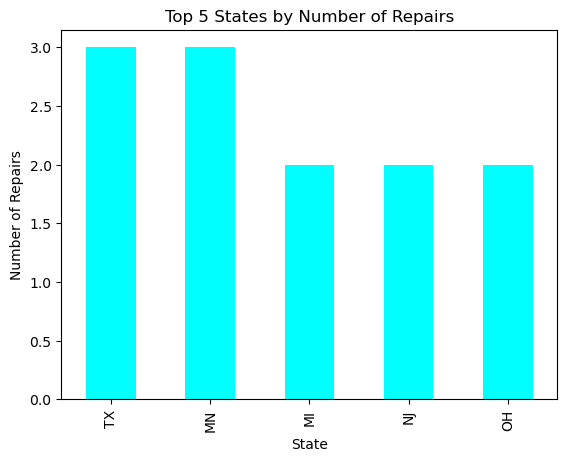

In [19]:
# 1 Bar Plot: Top 10 States by Number of Repairs

# Count of repairs per state
df["STATE"].value_counts().head(5).plot(kind="bar", color="cyan")

plt.title("Top 5 States by Number of Repairs")
plt.xlabel("State")
plt.ylabel("Number of Repairs")
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


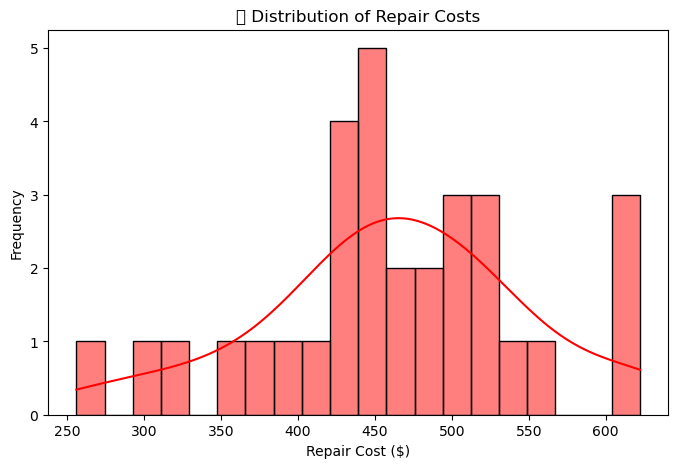

In [20]:
# 2 Hist Plot: Repair Cost Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["TOTALCOST"], bins=20, kde=True, color="red")
plt.xlabel("Repair Cost ($)")
plt.ylabel("Frequency")
plt.title("🔹 Distribution of Repair Costs")
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


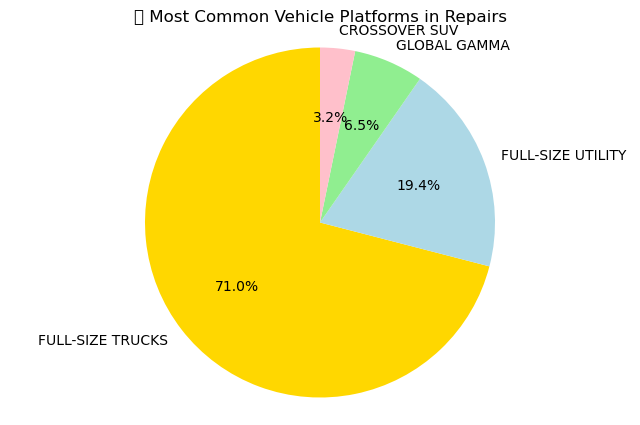

In [21]:
# 3 Pie Chart: Most Common Vehicle Platforms in Repairs

# Plot pie chart
platform_counts = df["PLATFORM"].value_counts()
labels = platform_counts.index
sizes = platform_counts.values

plt.figure(figsize=(8, 5))
plt.pie(
    sizes,
    labels=labels,
    colors=["gold", "lightblue", "lightgreen", "pink"],
    autopct="%.1f%%",   # show percentages
    startangle=90       # start from top
)

# Equal aspect ratio ensures pie is a circle
plt.axis("equal")

# Title
plt.title("🔹 Most Common Vehicle Platforms in Repairs")

plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11092\3359756318.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df["CUSTOMER_VERBATIM"].value_counts().head(10).index,
C:\Users\HP\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


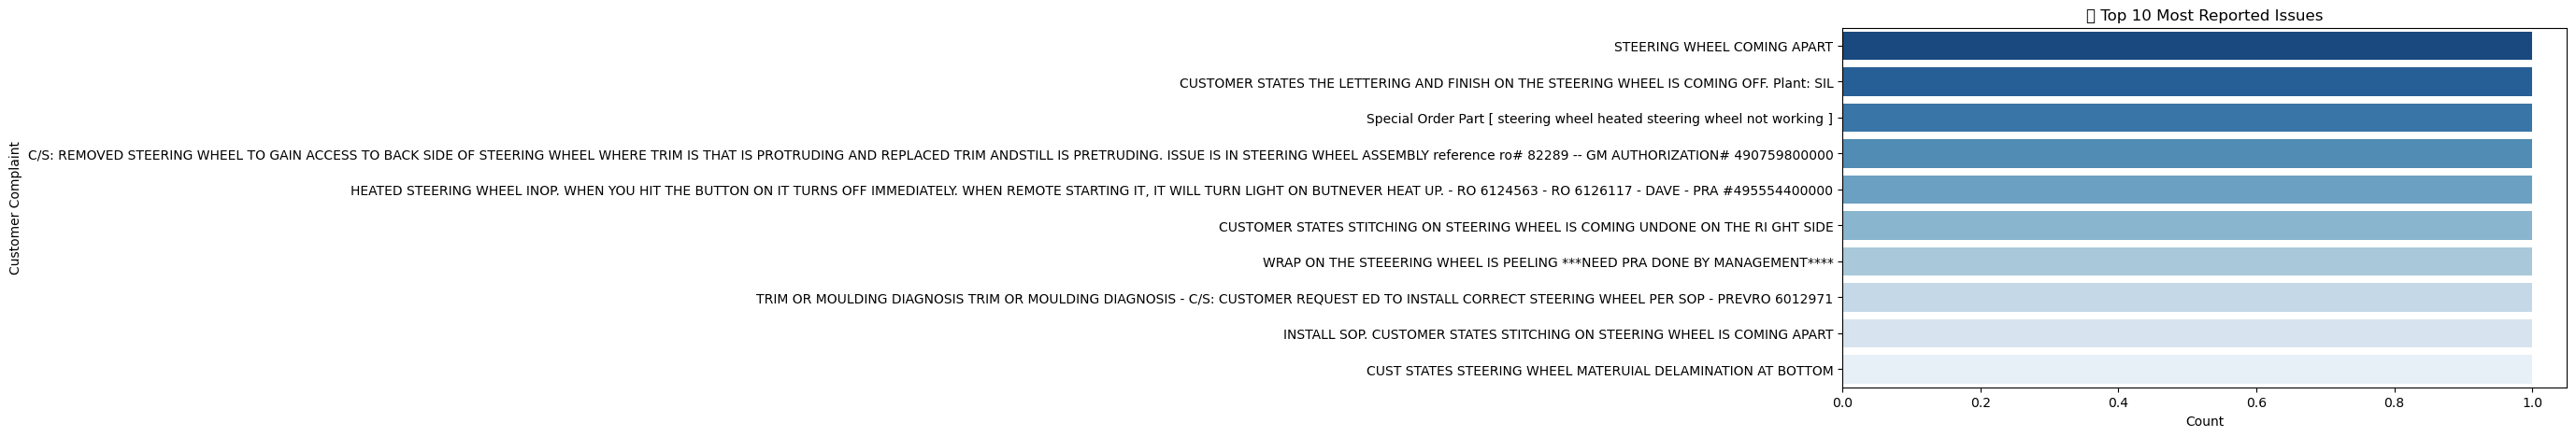

In [22]:
#4 Most Common Issues Reported by Customers
plt.figure(figsize=(10, 5))
sns.barplot(y=df["CUSTOMER_VERBATIM"].value_counts().head(10).index,
            x=df["CUSTOMER_VERBATIM"].value_counts().head(10).values, palette="Blues_r")
plt.xlabel("Count")
plt.ylabel("Customer Complaint")
plt.title("🔹 Top 10 Most Reported Issues")
plt.show()

# 4. Generating Tags/Features from Free Text Fields

In [23]:
text_cols = ["CUSTOMER_VERBATIM", "CORRECTION_VERBATIM", "CAUSAL_PART_NM"]

In [24]:
import re

def clean_text(text):
    if pd.isna(text):
        return ""
    text = text.lower()
    text = re.sub(r"[^a-z0-9\s]", " ", text)  # remove punctuation
    text = re.sub(r"\s+", " ", text).strip()
    return text

for col in text_cols:
    df[col] = df[col].apply(clean_text)

In [25]:
failure_conditions = {
    "inop": "Inoperative",
    "not working": "Inoperative",
    "peeling": "Surface Damage",
    "coming apart": "Physical Damage",
    "noise": "Noise Issue",
    "loose": "Loose Fitment",
    "bubbling": "Surface Defect",
    "fraying": "Material Wear",
    "cracked": "Cracked Component",
    "stitching": "Stitching Defect",
    "heated": "Heating Failure"
}

components = {
    "steering wheel": "Steering Wheel",
    "module": "Control Module",
    "harness": "Wiring Harness",
    "trim": "Trim/Applique",
    "cover": "Cover",
    "switch": "Switch",
    "airbag": "Airbag",
    "spoke": "Spoke Assembly"
}

In [26]:
def extract_tags(text, keyword_dict):
    tags = []
    for kw, tag in keyword_dict.items():
        if kw in text:
            tags.append(tag)
    return list(set(tags))  # remove duplicates

In [27]:
df["Failure_Tags"] = df["CUSTOMER_VERBATIM"].apply(lambda x: extract_tags(x, failure_conditions))
df["Component_Tags"] = (
    df["CUSTOMER_VERBATIM"] + " " + df["CORRECTION_VERBATIM"] + " " + df["CAUSAL_PART_NM"]
).apply(lambda x: extract_tags(x, components))


In [28]:
df["Failure_Tags"] = df["Failure_Tags"].apply(lambda tags: ", ".join(tags) if tags else "")
df["Component_Tags"] = df["Component_Tags"].apply(lambda tags: ", ".join(tags) if tags else "")

In [29]:
df["Component_Tags"]

0                    Steering Wheel
3                    Steering Wheel
7                    Steering Wheel
10    Steering Wheel, Trim/Applique
17                   Steering Wheel
20                   Steering Wheel
25                   Steering Wheel
28    Steering Wheel, Trim/Applique
29                   Steering Wheel
31                   Steering Wheel
32                   Steering Wheel
35                   Steering Wheel
38            Steering Wheel, Cover
39                   Steering Wheel
41                   Steering Wheel
44                   Steering Wheel
46                   Steering Wheel
64                   Steering Wheel
68                   Steering Wheel
70            Steering Wheel, Cover
71                   Steering Wheel
72                   Steering Wheel
73                   Steering Wheel
75                   Steering Wheel
78                   Steering Wheel
80                   Steering Wheel
81                   Steering Wheel
85                   Steerin

In [30]:
df["Failure_Tags"]

0                       Physical Damage
3                                      
7          Heating Failure, Inoperative
10                                     
17         Heating Failure, Inoperative
20                     Stitching Defect
25                       Surface Damage
28                                     
29    Stitching Defect, Physical Damage
31                                     
32                                     
35                      Physical Damage
38                      Physical Damage
39                                     
41                      Heating Failure
44                                     
46                                     
64    Stitching Defect, Physical Damage
68                      Heating Failure
70                                     
71                      Heating Failure
72                                     
73                        Loose Fitment
75                      Heating Failure
78                        Loose Fitment


In [31]:
print(df[["CUSTOMER_VERBATIM","CORRECTION_VERBATIM","CAUSAL_PART_NM","Failure_Tags","Component_Tags"]])

                                    CUSTOMER_VERBATIM  \
0                         steering wheel coming apart   
3   customer states the lettering and finish on th...   
7   special order part steering wheel heated steer...   
10  c s removed steering wheel to gain access to b...   
17  heated steering wheel inop when you hit the bu...   
20  customer states stitching on steering wheel is...   
25  wrap on the steeering wheel is peeling need pr...   
28  trim or moulding diagnosis trim or moulding di...   
29  install sop customer states stitching on steer...   
31  cust states steering wheel materuial delaminat...   
32  customer states steering wheel does not heat b...   
35  c s cust states leater at the bottom of the st...   
38  customer states that the steering wheel cover ...   
39  steering wheel damaged in transit tear rip on ...   
41  inspect and advise heated steering wheel is no...   
44  check and report steering wheel only stays luk...   
46  c s client states steering 

# 5. Summary and Insights

## 0.1 summary of the tags generated
From the free‑text fields (CUSTOMER_VERBATIM, CORRECTION_VERBATIM, CAUSAL_PART_NM), we generated structured tags under two broad categories:

a) Failure Conditions — e.g., Inoperative, Heating Failure, Physical Damage, Surface Defect, Noise Issue, Loose Fitment, Material Wear, Electrical Failure.

b) Affected Components — e.g., Steering Wheel, Heated Steering Wheel Module, Wiring Harness, Spoke Cover / Trim, Control Module, Airbag Assembly.

## 0.2 Potential Insights
a) High‑Frequency Failures — Steering wheel replacements dominate, with recurring issues in stitching, leather peeling, bubbling, and heating element failures.

b) Component Reliability — Heated steering wheel modules and horn switch wiring harnesses appear as repeat offenders, suggesting design or supplier quality concerns.

c) Failure Mode Patterns — Many heating failures are intermittent, indicating possible electrical connection or control module issues rather than outright element burnout.

d) Preventive Opportunities — Several cosmetic and trim issues (peeling, fraying) could be mitigated by material or adhesive improvements in manufacturing.

## 0.3 Actionable Recommendations
a) Engineering & Design — Review supplier quality for heated steering wheel modules; consider redesigning connectors to reduce intermittent faults.

b)Materials & Manufacturing — Upgrade leather/adhesive specifications to reduce peeling and fraying under heat and wear.

c) Service Process — Provide technicians with targeted diagnostic flowcharts for heating failures to reduce unnecessary full‑wheel replacements.

d) Warranty Strategy — Track high‑cost repeat repairs (e.g., module + wheel replacements) to identify cost‑reduction opportunities.

e )Customer Communication — Proactively inform customers about known cosmetic issues and offer early interventions to improve satisfaction.

## 0.4 ⚠️ Dataset Discrepancies & Cleaning Approach: 
        
        "**Null Values Handling:**": "Filled missing categorical values with mode, and numerical values with median.",
        
        "**Outlier Treatment:**": "Applied IQR filtering to remove extreme values affecting repair cost distribution.",
        
        "**Text Noise:**": "Typos, abbreviations, and mixed‑case entries were cleaned and lower‑cased before keyword matching to improve tagging accuracy.",
        
        "**Primary Key Integrity:**": "Checked uniqueness of VIN and TRANSACTION_ID to maintain data accuracy."

# 6. Save Cleaned Dataset

In [32]:
cleaned_file_path = "Cleaned_Task_2.xlsx"
df.to_excel(cleaned_file_path, index=False)
print("Cleaned dataset saved as Cleaned_Task_2.xlsx")

Cleaned dataset saved as Cleaned_Task_2.xlsx
